# Logistic Regression


We are trying to decide between whether an object belongs to one of two categories:  $C_0$ and $C_1$.  In terms of probability, we frame this as the likelihood that something belongs to $C_1$ as:

$$ y = P(C_1 | x)$$

which is the conditional probability of $C_1$ given some $x$.  Because we are talking about a binary situation, we know:

$$ P(C_1 | x) + P(C_0 | X) = 1$$

$$ y + P(C_0 | X) = 1$$

$$ 1 - y = P(C_0 | X)$$

**Probability and Odds**

If we consider the odds of a binary event, we are really talking about 

$$\frac{p}{1 - p}$$

Recognizing this expression as having the same structure as the transformation that linearizes a set of data having an s-shaped curve, (i.e. $\frac{y}{1-y}$) we connect the idea of odds and that the logistic function is in fact giving us the **log odds** for some value $x$.  Hence, we have:

$$\ln(\frac{y}{1-y}) = \text{logit}(y)$$

and if we solve for $y$ we have:

$$y = \frac{1}{1 + e^{-(ax + b)}}$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Example

Heights of Boys against Girls.

In [2]:
b = np.random.normal(149.05, 3.75, 800)
g = np.random.normal(151.19, 3.75, 700)

(array([  6.,  33.,  86., 153., 170., 141.,  72.,  28.,   7.,   4.]),
 array([140.86823496, 143.17948163, 145.49072829, 147.80197496,
        150.11322162, 152.42446828, 154.73571495, 157.04696161,
        159.35820827, 161.66945494, 163.9807016 ]),
 <a list of 10 Patch objects>)

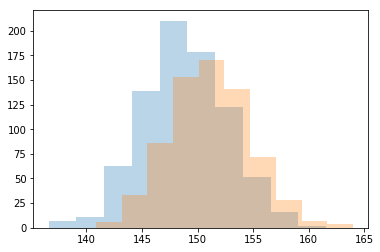

In [3]:
plt.hist(b, alpha = 0.3)
plt.hist(g, alpha = 0.3)

In [4]:
b = [[x, 0] for x in b]
g = [[x, 1] for x in g]

In [5]:
bg = np.array(b + g)

In [6]:
bg

array([[143.80649361,   0.        ],
       [150.53906707,   0.        ],
       [144.88529729,   0.        ],
       ...,
       [146.16655035,   1.        ],
       [149.13206836,   1.        ],
       [148.58955927,   1.        ]])

In [8]:
bg[:, 0]

array([146.3628498 , 144.38709858, 145.60397019, ..., 148.20954049,
       158.04489217, 148.96373612])

In [9]:
bg[:, 1]

array([0., 0., 0., ..., 1., 1., 1.])

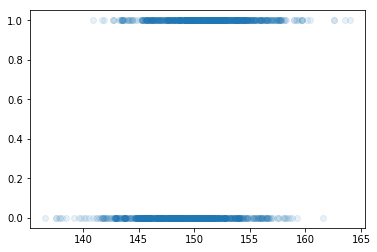

In [7]:
x = bg[:, 0]
y = bg[:, 1]
plt.plot(x, y, 'o', alpha = 0.1)

In [8]:
boy_girl = pd.DataFrame(bg, columns= ['heights', 'gender'])

In [9]:
boy_girl.head()

,heights,gender
0,143.806494,0.0
1,150.539067,0.0
2,144.885297,0.0
3,151.345817,0.0
4,156.712597,0.0


In [10]:
girls = boy_girl[boy_girl['gender'] == 1]

(array([  6.,  39., 125., 278., 448., 589., 661., 689., 696., 700.]),
 array([140.86823496, 143.17948163, 145.49072829, 147.80197496,
        150.11322162, 152.42446828, 154.73571495, 157.04696161,
        159.35820827, 161.66945494, 163.9807016 ]),
 <a list of 10 Patch objects>)

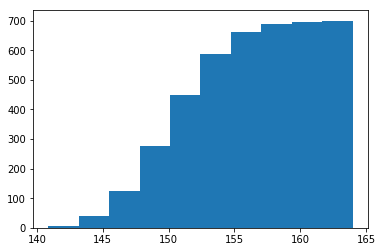

In [11]:
plt.hist(girls['heights'], cumulative = True)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X = boy_girl['heights'].values.reshape(-1,1)
y = boy_girl['gender']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
lr.score(X, y)

0.5806666666666667

In [15]:
lr.coef_[0][0]

0.02789290120006376

In [16]:
lr.intercept_[0]

-4.304404401025475

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
predictions = lr.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

        0.0       0.57      0.92      0.70       800
        1.0       0.68      0.19      0.30       700

avg / total       0.62      0.58      0.51      1500



In [22]:
confusion_matrix(y, predictions)

array([[743,  57],
       [563, 137]])

  |  | $C_0$ | $C_1$ |
  | ----- | ----- | ----- |
  | $C_0$|  | |
  | $C_1$|  |  |
  
  **Precision**: Proportion of values from thos predicted to be in $C_1$ correctly.
  
  $$\frac{TP}{TP + FP}$$
  
  **Recall**: Proportion of values that are actually in $C_1$ predicted correctly.
  
  $$\frac{TP}{TP + FN}$$
  
  Ideally, we'd like this to be as high as possible in each regard.  We can understand the relationship between Precision and Recall through their harmonic mean -- the F1 score.
  
  **F1**: Harmonic mean of Precision and Recall
  
  $$\frac{2PR}{P + R}$$

In [20]:
from sklearn import datasets

In [21]:
iris = datasets.load_iris()

In [22]:
X = iris['data'][:, 3:]#petalwidth
y = (iris['target'] == 2).astype(np.int)

In [23]:
lgr = LogisticRegression()
lgr.fit(X,y)
predictions= lgr.predict(X)

In [24]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
prb_predict= lgr.predict_proba(X)
prb_predict

array([[0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.94845101, 0.05154899],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.

In [26]:
probs = pd.DataFrame(prb_predict, columns=['0', '1'])

In [27]:
probs.head()

,0,1
0,0.975814,0.024186
1,0.975814,0.024186
2,0.975814,0.024186
3,0.975814,0.024186
4,0.975814,0.024186


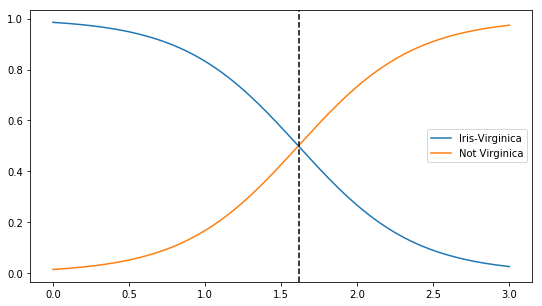

In [38]:
plt.figure(figsize = (9, 5))
x = np.linspace(0, 3, 150).reshape(-1,1)
y_probs= lgr.predict_proba(x)
plt.plot(x, y_probs[:, 0], label= 'Iris-Virginica')
plt.plot(x,y_probs[:,1], label= 'Not Virginica')
plt.legend()
plt.axvline(x = 1.62, color= 'black',linestyle = '--')

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_predict, cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [135]:
precision_score(y, predictions)

0.9583333333333334

In [136]:
recall_score(y, predictions)

0.92

In [29]:
f1_score(y, predictions)

NameError: name 'f1_score' is not defined

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression())

In [44]:
params = {'polynominalfeatures__degree': [i for i in range(1,5)], 'logisticregression__C': [0.1,1,5,10,100]}

In [45]:
grid = GridSearchCV(cv=5, error_score='raise')

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [43]:
grid.fit(X_train, y_train)

NameError: name 'grid' is not defined